In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [70]:
df=pd.read_csv("yield_df.csv")
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [71]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [72]:
df.shape

(28242, 7)

**Information of the dataset**

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [74]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [75]:
df.duplicated().sum()

np.int64(2310)

In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [79]:
def isString(obj):
  try:
    float(obj)
    return False
  except:
    return True


In [80]:
drop_row_index=df[df['average_rain_fall_mm_per_year'].apply(isString)].index

In [81]:
df=df.drop(drop_row_index)

In [82]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [83]:
df.shape

(25932, 7)

In [84]:
df['average_rain_fall_mm_per_year']=df['average_rain_fall_mm_per_year'].astype(np.float64)

**Graph Frequency vs Area**

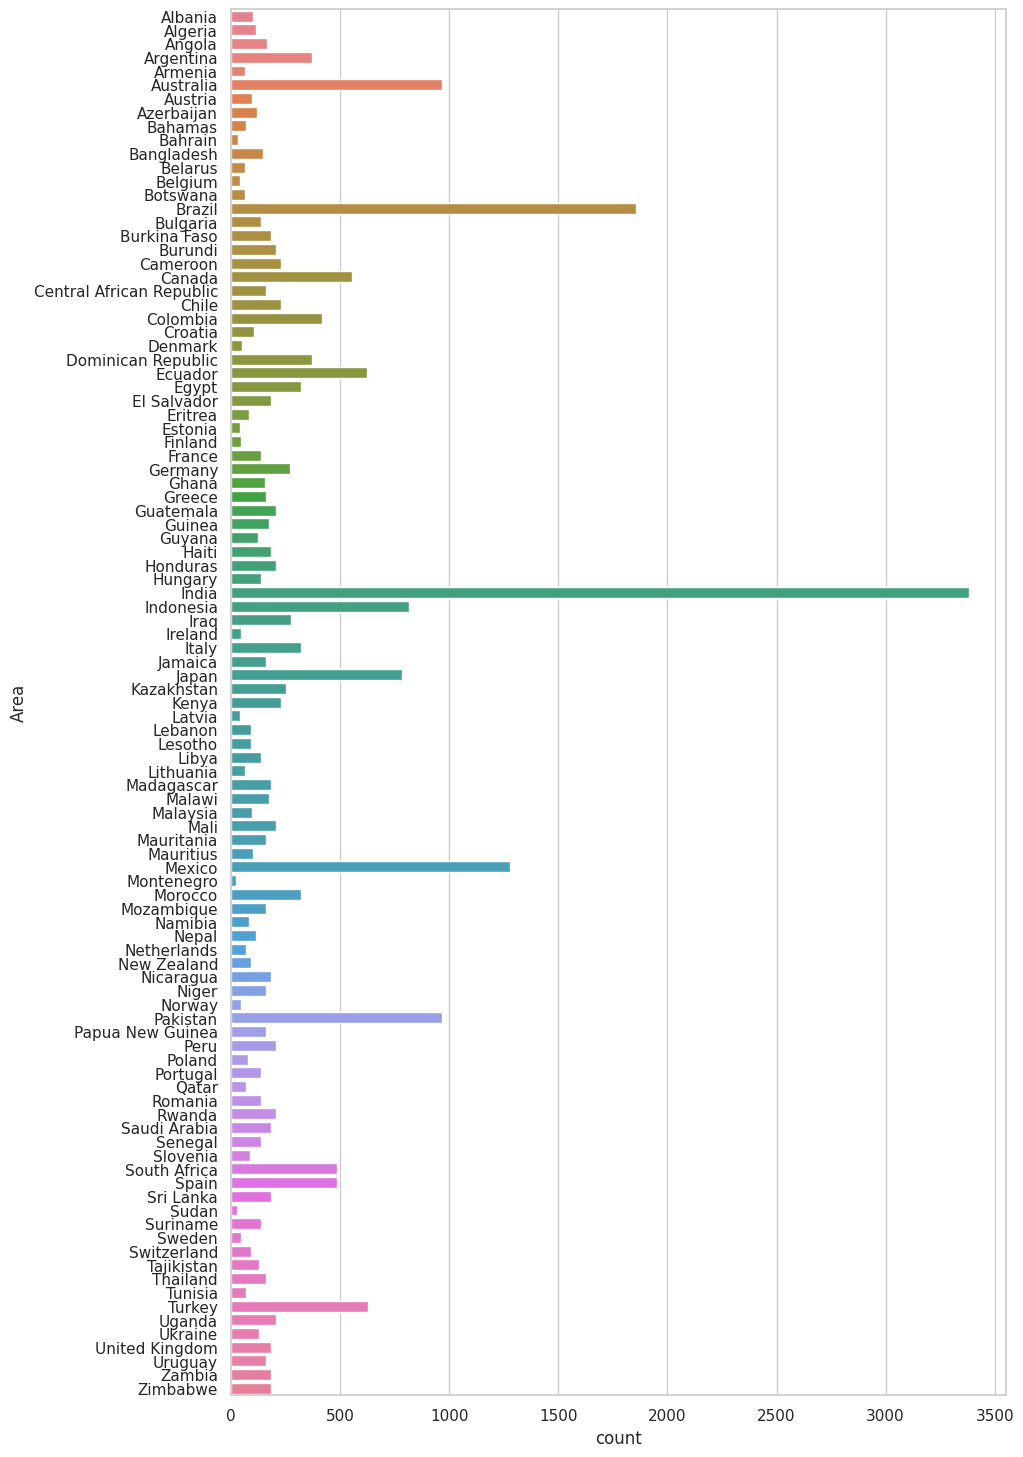

In [85]:
plt.figure(figsize=(10,18))
sns.countplot(data=df,y='Area',hue='Area')
plt.show()

In [86]:
df['Area'].value_counts().head()

,count
Area,
India,3384
Brazil,1854
Mexico,1280
Australia,966
Pakistan,966


**Yeild Per Country**

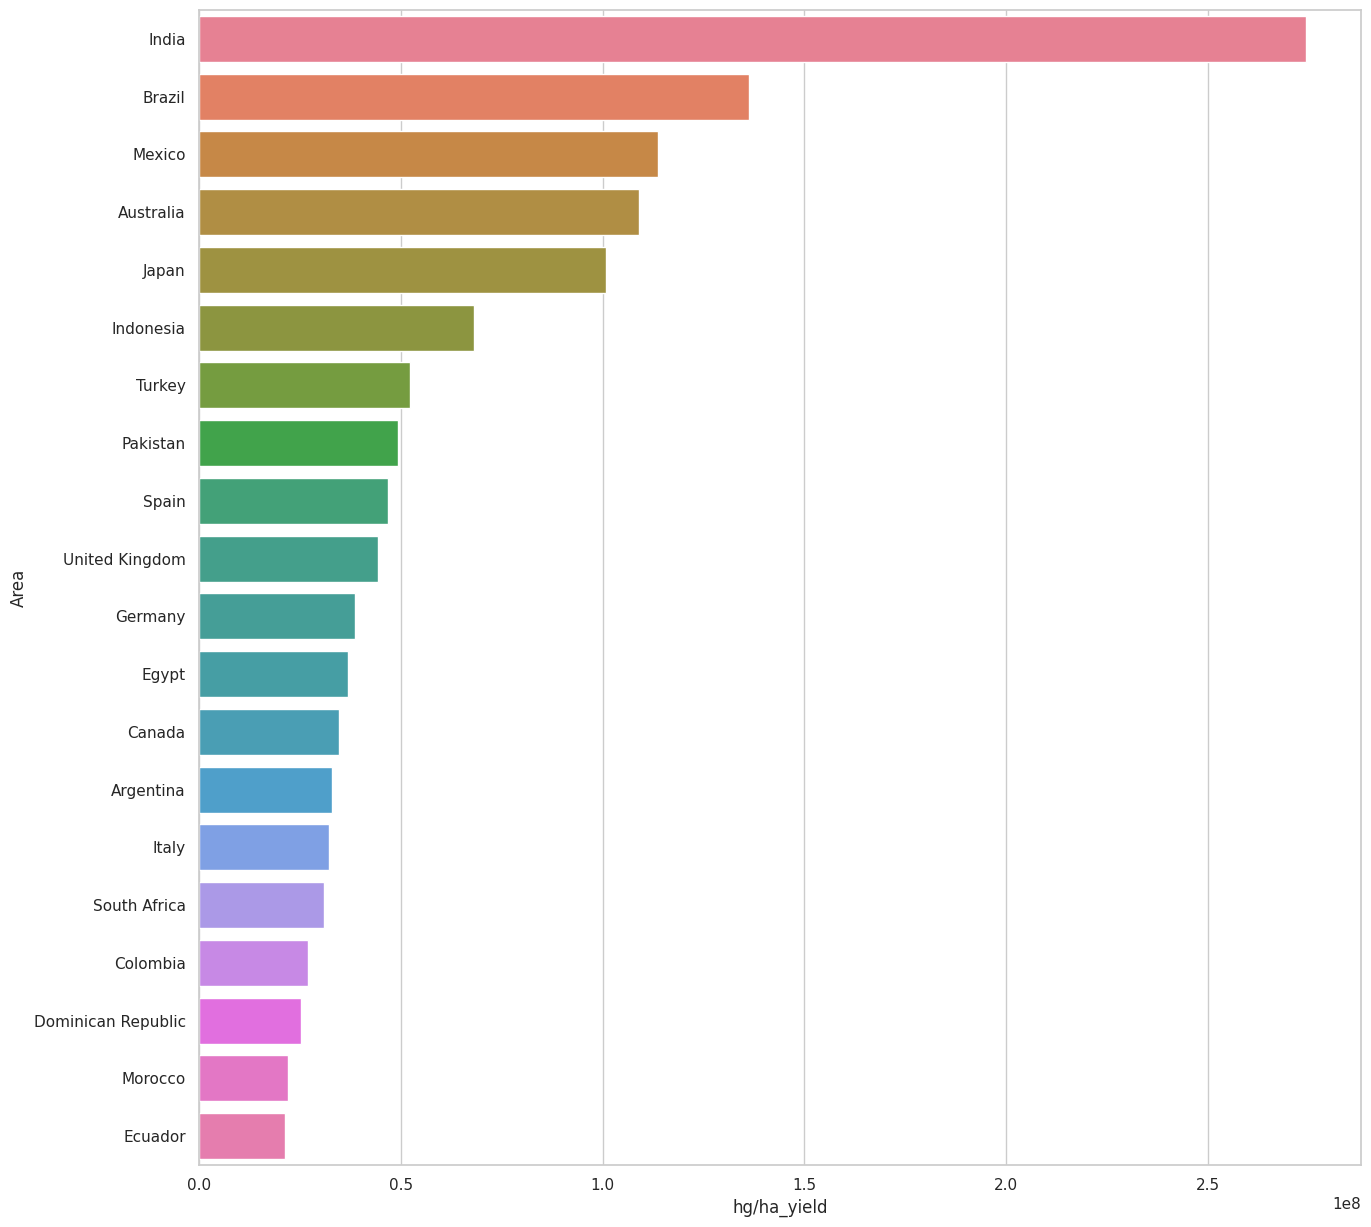

In [87]:
plt.figure(figsize=(15,15))
yeild_per_country=df.groupby('Area',as_index=False)['hg/ha_yield'].sum().sort_values(by='hg/ha_yield',ascending=False).head(20)
sns.barplot(data=yeild_per_country,x='hg/ha_yield',y='Area',hue='Area')
plt.show()

**Frequency of item**

In [88]:
df['Item'].value_counts()

,count
Item,
Potatoes,3956
Maize,3824
Wheat,3539
"Rice, paddy",3091
Soybeans,2940
Sorghum,2770
Sweet potatoes,2593
Cassava,1889
Yams,774


<Axes: xlabel='count', ylabel='Item'>

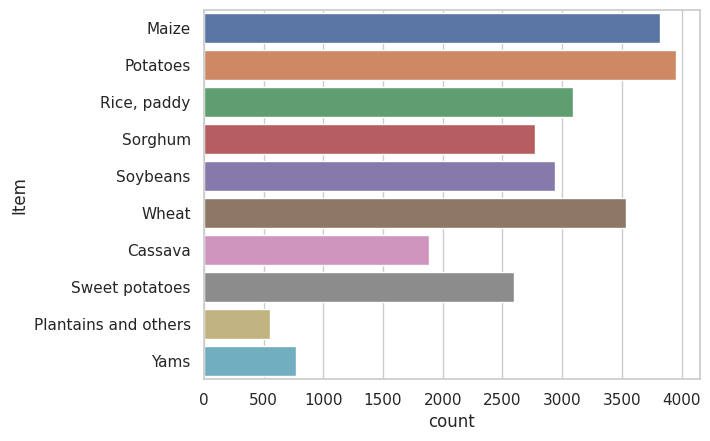

In [89]:
sns.countplot(y=df['Item'],hue=df['Item'])

**yeild vs item**

<Axes: xlabel='hg/ha_yield', ylabel='Item'>

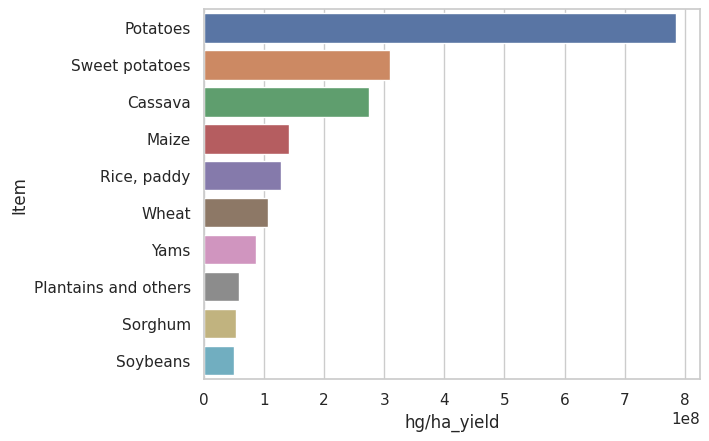

In [90]:
yeild_item=df.groupby('Item',as_index=False)['hg/ha_yield'].sum().sort_values(by='hg/ha_yield',ascending=False)
sns.barplot(data=yeild_item,x='hg/ha_yield',y='Item',hue='Item')

**yeild vs item vs country**

In [91]:
grouped_df=df.groupby(['Item','Area'],as_index=False)['hg/ha_yield'].sum()

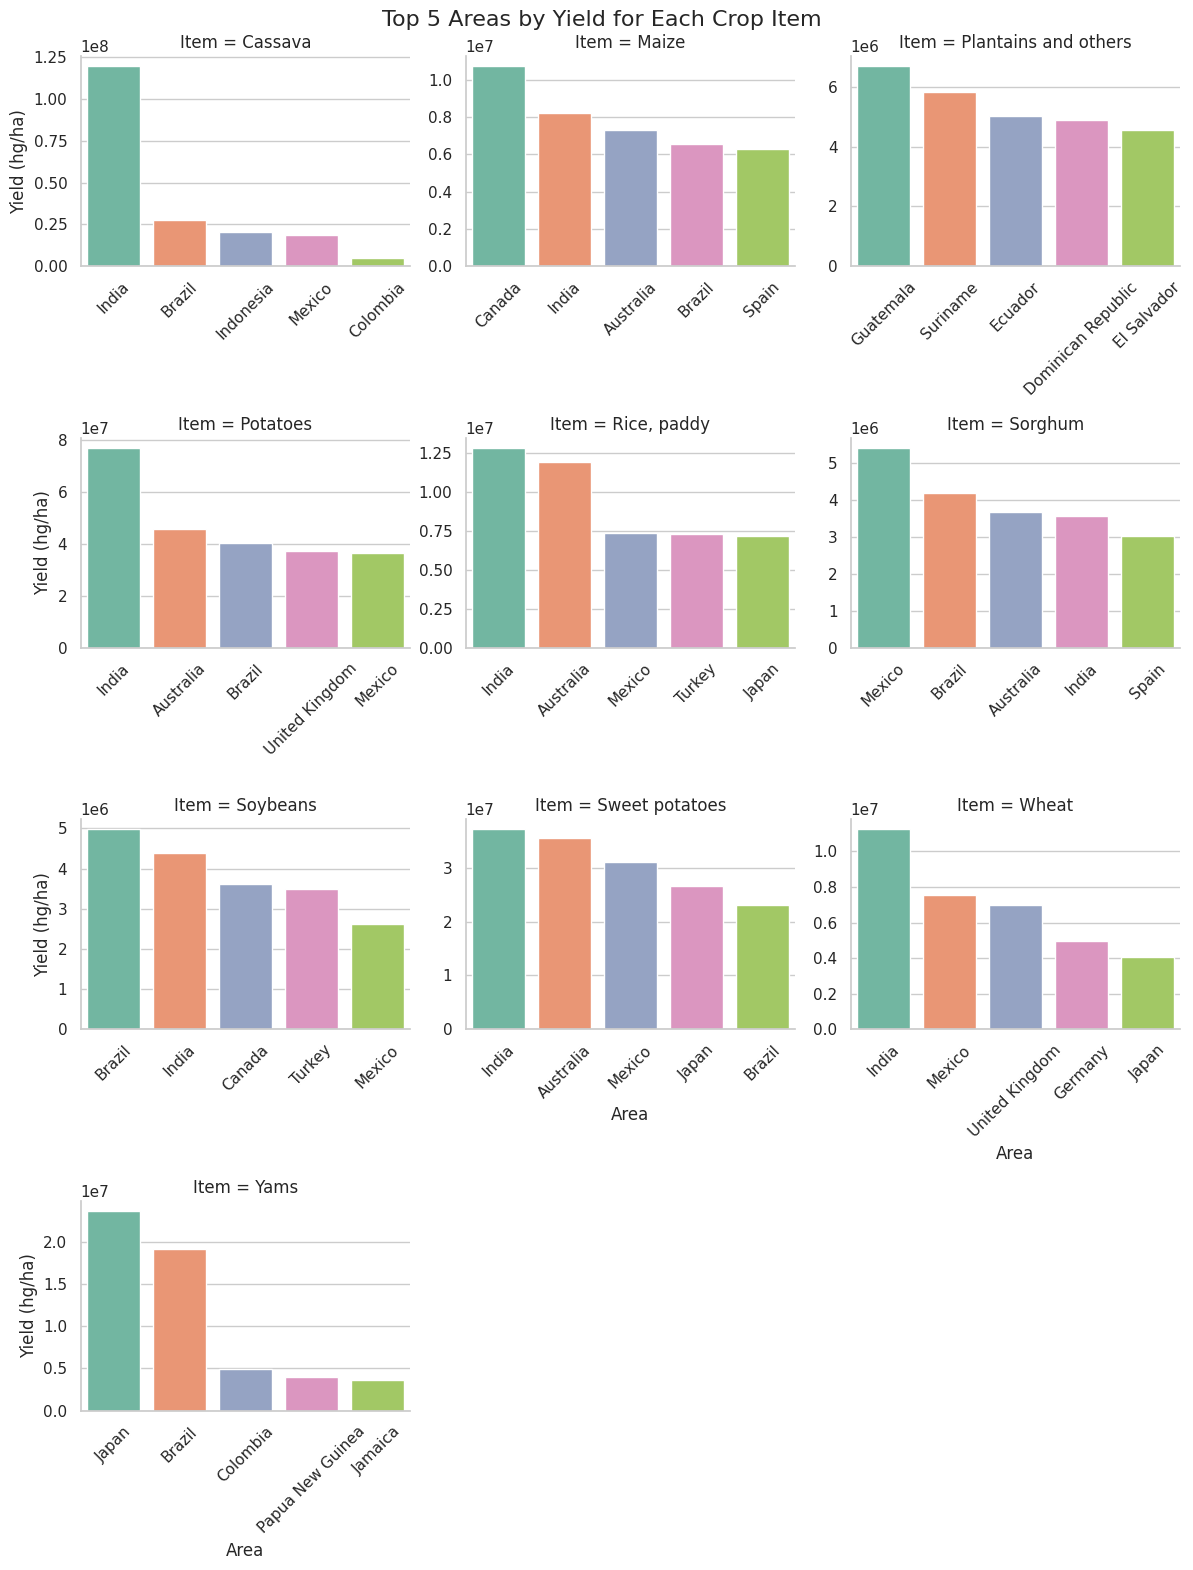

In [92]:
top5_per_item = (
    grouped_df
    .sort_values(['Item', 'hg/ha_yield'], ascending=[True, False])
    .groupby('Item')
    .head(5)
)
sns.set(style="whitegrid")

# Create a FacetGrid: each Item gets its own subplot
g = sns.FacetGrid(top5_per_item, col="Item", col_wrap=3, height=4, sharex=False, sharey=False)

g.map_dataframe(
    sns.barplot,
    x="Area",
    y="hg/ha_yield",
    hue="Area",
    palette="Set2",
    legend=False
)

g.set_xticklabels(rotation=45)
g.set_axis_labels("Area", "Yield (hg/ha)")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Top 5 Areas by Yield for Each Crop Item", fontsize=16)

plt.tight_layout()
plt.show()

**Train Test split**

In [93]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [94]:
# rearrange the col
col= ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df=df[col]

In [95]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y

,hg/ha_yield
0,36613
1,66667
2,23333
3,12500
4,7000
...,...
28237,22581
28238,3066
28239,13142
28240,22222


In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Convert Categorical To numerical values and scaling the value**

In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
ohe=OneHotEncoder(drop='first')
scale=StandardScaler()
preprocessor=ColumnTransformer(
    transformers=[
        ('StandardScale',scale,[0,1,2,3]),
        ('OHE',ohe,[4,5])
    ],
    remainder='passthrough'
)

In [101]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

**Train Model**

In [108]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train,y_train)
    y_pred = md.predict(X_test)

    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 29920.744984952693 score : 0.7486566730352529


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199884855864.92188, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss : mae : 29907.6413824903 score : 0.7485842409647616
Rid : mae : 29875.520211067316 score : 0.7485421069884581
Dtr : mae : 4056.1779448621555 score : 0.9782408783317965


In [109]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr.predict(X_test)

array([160124.,  15838.,  72614., ...,  52692.,   9621., 132600.])

**Predictive System**

In [113]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [120]:
def model_prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
  features=np.array([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]])
  transform_feature=preprocessor.transform(features)
  predicted_yeild=dtr.predict(transform_feature).reshape(1,-1)
  return predicted_yeild[0]


In [124]:
Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37
Area = 'Albania'
Item = 'Potatoes'
result =model_prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)
print(result)

[66667.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [123]:
df.head(2)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667


**Pikle Files**

In [125]:
import pickle

In [126]:
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocesser.pkl','wb'))